In [1]:
# -*- coding: UTF-8 -*-
import numpy as np
import operator
from os import listdir
from sklearn.svm import SVC

"""
函数说明:向量转化。

Parameters:
    filename - 文件名
Returns:
    returnVect - 返回的二进制原始波形图像的向量

Modify:
    ---
"""

def vector(filename):
    # 创建向量
    returnVect = np.zeros((1, 8192))
    # print(returnVect)
    # 打开文件
    fr = open(filename)
    # 按行读取
    for i in range(8192):
        # 读一行数据
        lineStr = fr.readline().strip("\n")
        # print(lineStr)
        # 每一行的前32个元素依次添加到returnVect中
        returnVect[0][i] = lineStr
    # 返回转换后的向量
    print(returnVect)
    return returnVect
print(vector("../../KNN/dataset/test5/1000-1").shape)

[[0.         0.00304453 0.         ... 0.         0.00304453 0.00608906]]
(1, 8192)


In [2]:
# train序列集合
trainSet = []
# test序列集合
testSet = []
# 结果序列集合
resSet = []

def vector(filename):
    # 创建向量
    returnVect = np.zeros((1, 8192))
    # print(returnVect)
    # 打开文件
    fr = open(filename)
    # 按行读取
    for i in range(8192):
        # 读一行数据
        lineStr = fr.readline().strip("\n")
        # print(lineStr)
        # 每一行的前32个元素依次添加到returnVect中
        returnVect[0][i] = lineStr
    # 返回转换后的向量
    # print(returnVect)
    return returnVect


def SignalClassTest():
    """
    分类
    Parameters:
            无
    Returns:
            无
    """
    # 测试集的Labels
    Labels = []
    # 返回trainingDigits目录下的文件名
    trainingFileList = listdir('../../KNN/dataset/train5/')
    # 返回文件夹下文件的个数
    m = len(trainingFileList)
    # 初始化训练的Mat矩阵,测试集
    trainingMat = np.zeros((m, 8192))
    # 从文件名中解析出训练集的类别
    for i in range(m):
        # 获得文件的名字
        fileNameStr = trainingFileList[i]
        # 获得分类的数字
        classNumber = int(fileNameStr.split('-')[1])
        # 将获得的类别添加到hwLabels中
        Labels.append(classNumber)
        # 将每一个文件的数据存储到trainingMat矩阵中
        trainingMat[i, :] = vector(
            '../../KNN/dataset/train5/%s' % (fileNameStr))
    clf = SVC(C=0.5, kernel='linear')
    clf.fit(trainingMat, Labels)
    # 返回testDigits目录下的文件列表
    testFileList = listdir('../../KNN/dataset/test5/')
    # 错误检测计数
    errorCount = 0.0
    # 测试数据的数量
    mTest = len(testFileList)
    print(mTest)
    # 从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        # 获得文件的名字
        fileNameStr = testFileList[i]
        # 获得分类的数字
        classNumber = int(fileNameStr.split('-')[1])
        # 获得测试集的1x1024向量,用于训练
        vectorUnderTest = vector('../../KNN/dataset/test5/%s' % (fileNameStr))
        # 获得预测结果
        # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        classifierResult = clf.predict(vectorUnderTest)

        # print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        # if(classifierResult != classNumber):
        #     errorCount += 1.0

        # print res
        print(classifierResult)
        if classifierResult == 1:
            res = 'square'
            # 加入测试矩阵
            testSet.append(classNumber)
            # 加入结果矩阵
            resSet.append(int(classifierResult))
        if classifierResult == 2:
            res = 'circle'
            # 加入测试矩阵
            testSet.append(classNumber)
            # 加入结果矩阵
            resSet.append(int(classifierResult))
        if classNumber == 1:
            rockclass = 'square'
        if classNumber == 2:
            rockclass = 'circle'
        print("分类返回结果为%s\t真实结果为%s" % (res, rockclass))
        if (classifierResult != classNumber):
            errorCount += 1.0
        print("目前错误个数：", errorCount)
        print("process:{:.2f}%".format((i/mTest)*100))

    print("总共错了%d个数据\n错误率为%f%%，正确率为%f%%" %
          (errorCount, errorCount/mTest * 100, (1 - errorCount/mTest) * 100))


if __name__ == '__main__':
    SignalClassTest()


[[4914    0]
 [   0 4846]]


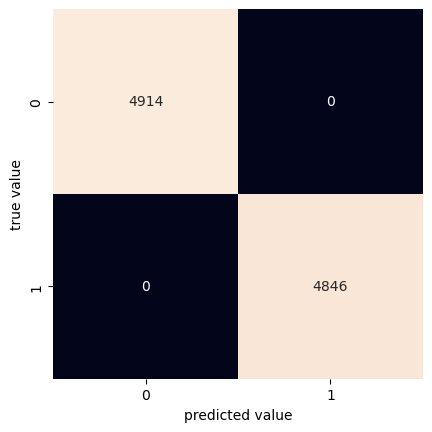

In [ ]:
# 绘制混淆矩阵
def sklearn_confusion_matrix(ytest, ymodel):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    mat = confusion_matrix(ytest, ymodel)
    print(mat)
    sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='.20g')
    plt.xlabel(u'predicted value')
    plt.ylabel('true value')

sklearn_confusion_matrix(testSet, resSet)


In [ ]:
# 准确率 召回率 F1
def get_precision_recall_f1(trues, predicts):
    TP = TN = FP = FN = 0
    precisioin = recall = f1 = 0
    for i in range(len(trues)):
        if trues[i] == 1 and predicts[i] == 1:
            TP += 1
        elif trues[i] == 0 and predicts[i] == 0:
            TN += 1
        elif trues[i] == 1 and predicts[i] == 0:
            FP += 1
        elif trues[i] == 0 and predicts[i] == 1:
            FN += 1
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2*precision*recall / (precision + recall)
    return precision, recall, f1

# trues = [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
# predicts = [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
# sklearn_confusion_matrix(trues, predicts)
    
precision, recall, f1 = get_precision_recall_f1(testSet, resSet)
print("precision = {}, recall = {}, f1 = {}".format(precision, recall, f1))

precision = 1.0, recall = 1.0, f1 = 1.0
